# Quality control
We will start by looking into quality scores of our sequences to do a quality check. To achieve this task, we use [`FASTQC`](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/) program with raw sequencing data. FASTQC provides an easy-to-understand html report, facilitating an efficient quality check of fastq files.

The command below run the `fastqc` program for each fastq (or compressed fastq.gz) file and produces a report for each file in the `output_directory`.


```{.bash}
fastqc fastq_directory -o output_directory
```

In our case, we have multiple compressed fastq files with the file extension of `.fastq.gz`. We will use the expression `*.fastq.gz` to specify all those files for the processing. The following command run fastqc program for every file.


```{.bash}
fastqc ./raw_data/*.fastq.gz -o ./fastqc_results
```

This execution results in the generation of a `html` and a `zip` file for each processed fastq file. The html file provides a report consisting of tables, figures about the quality check. The zip file contains all the figures, tables, and summaries. @fig-quality shows the distribution of quality scores for each position for a particular fastq file (`SRR6915103_1`).



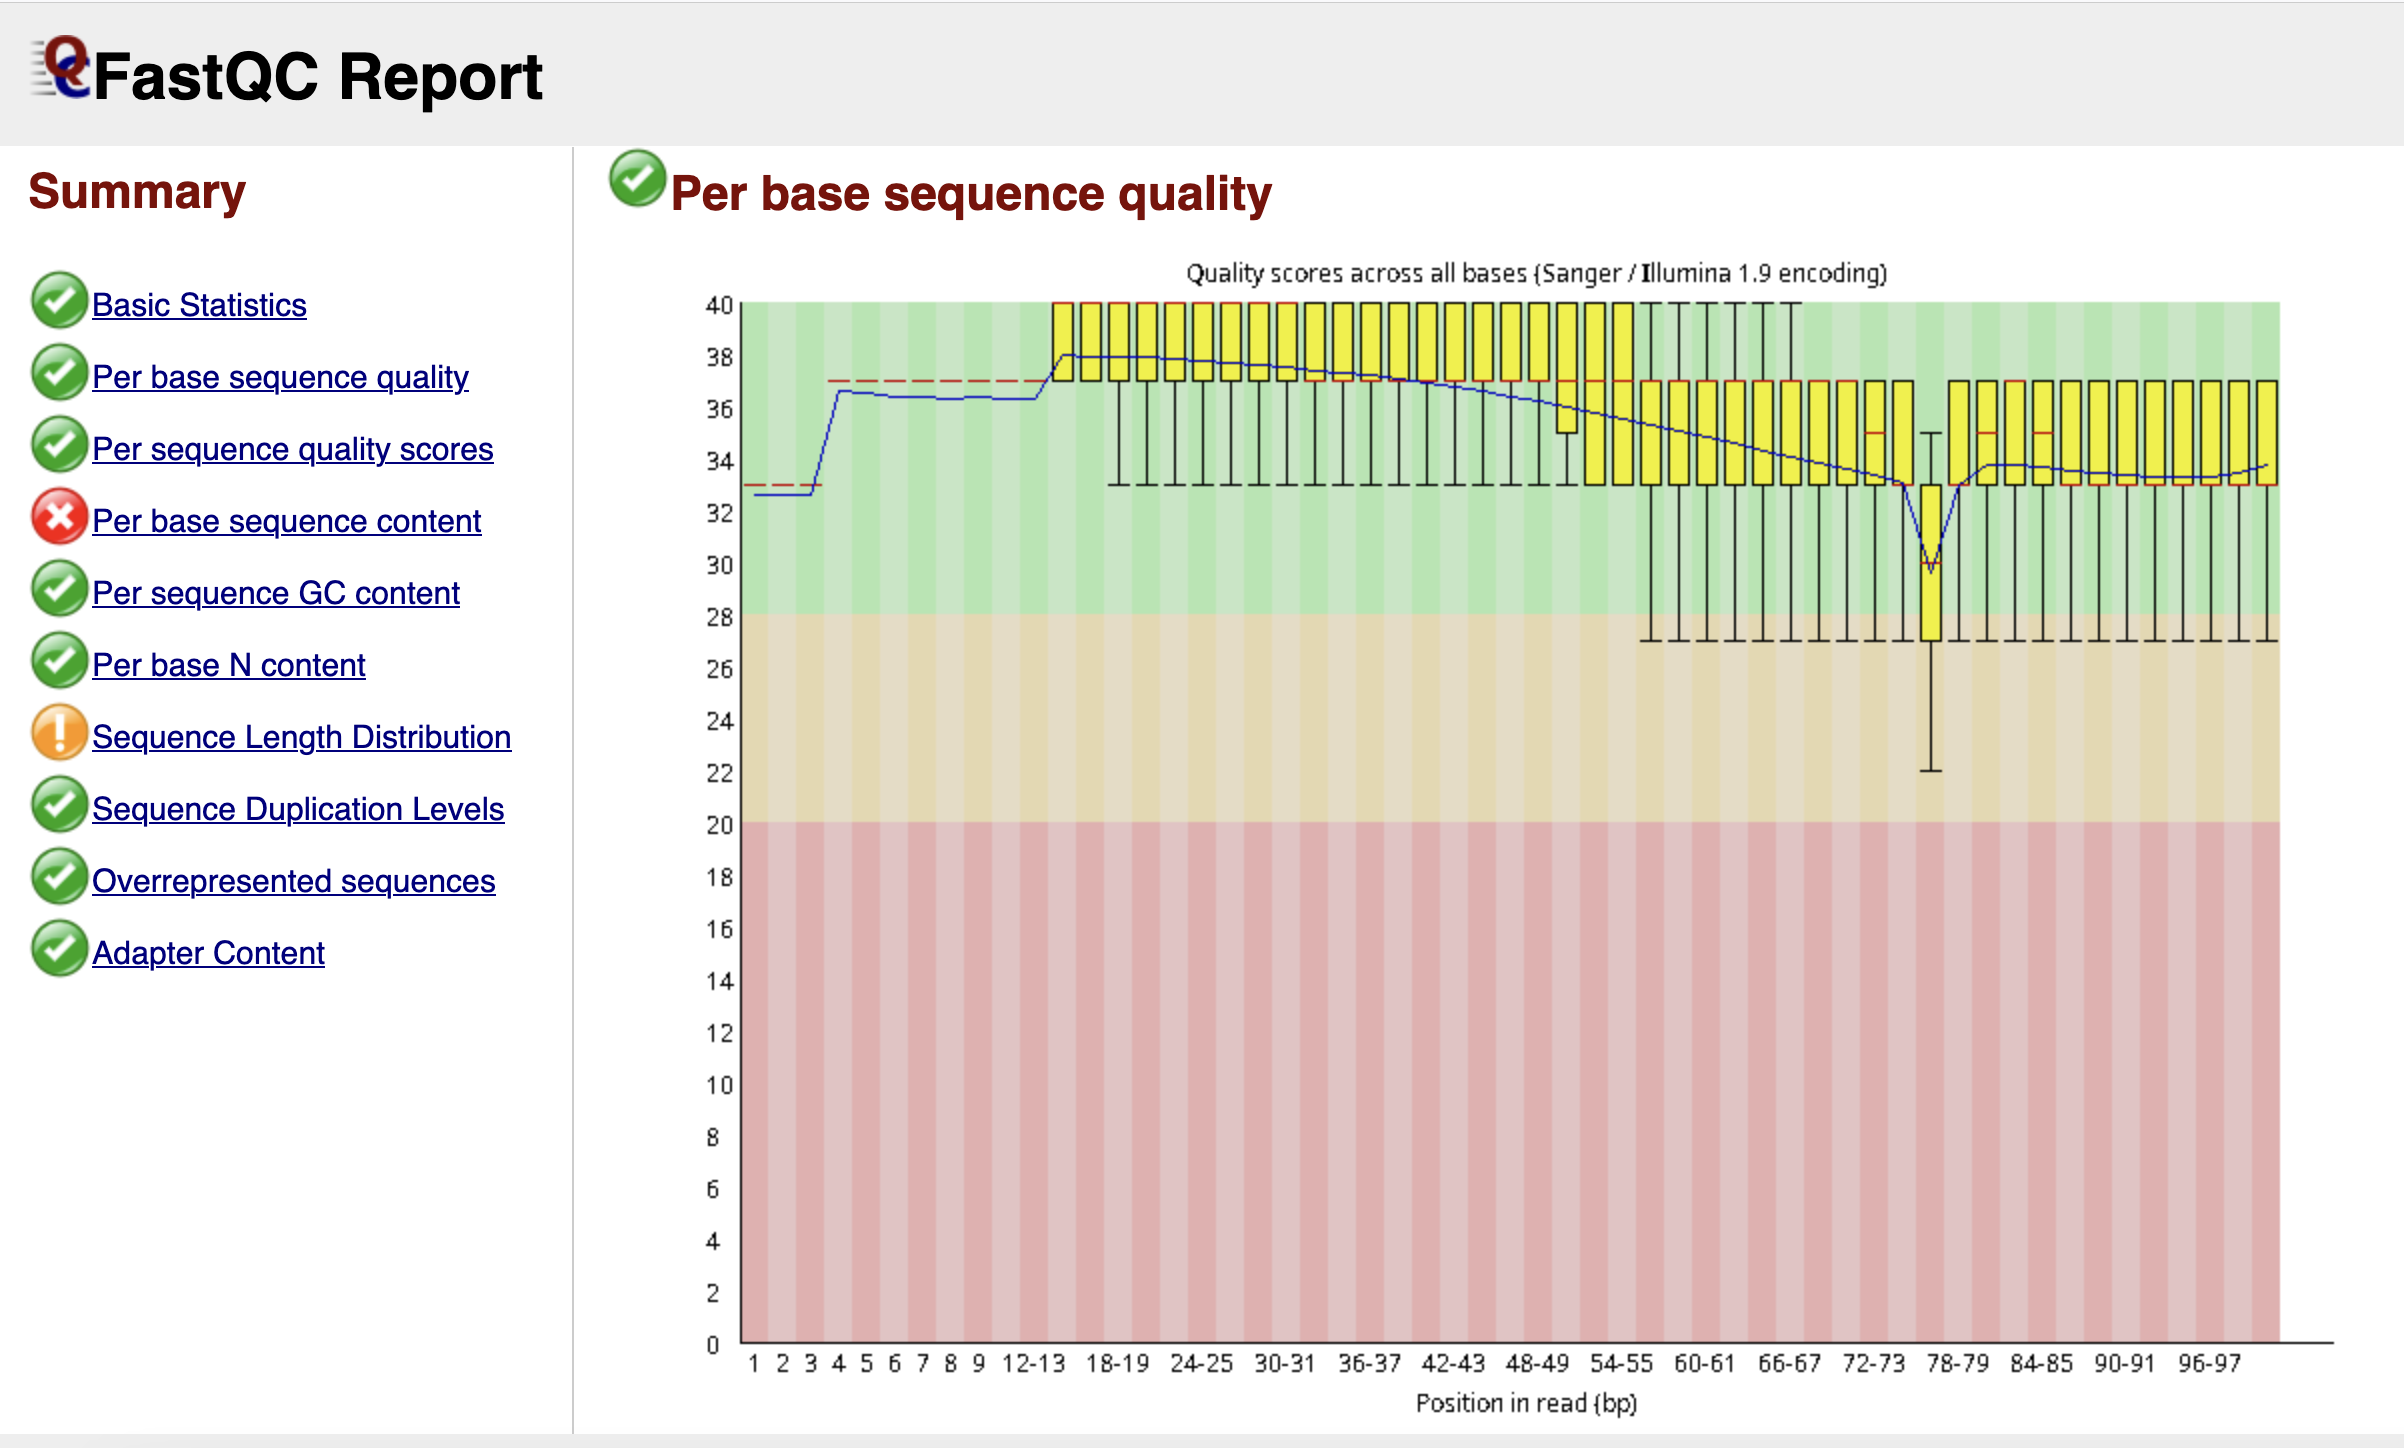{#fig-quality}



Such report is generated for each `fastq` file and it can become cumbersome checking each of those files for quality check. To simplify this step and aggregate all such reports into a single one, we use [`MULTIQC`](https://seqera.io/multiqc/) program.

The command below run multiqc program which generates a html report and a directory of images, tables, and summaries.

```{.bash}
multiqc ./fastqc_results -o multiqc_results
```

The below image shows a snapshot of multiqc report. 

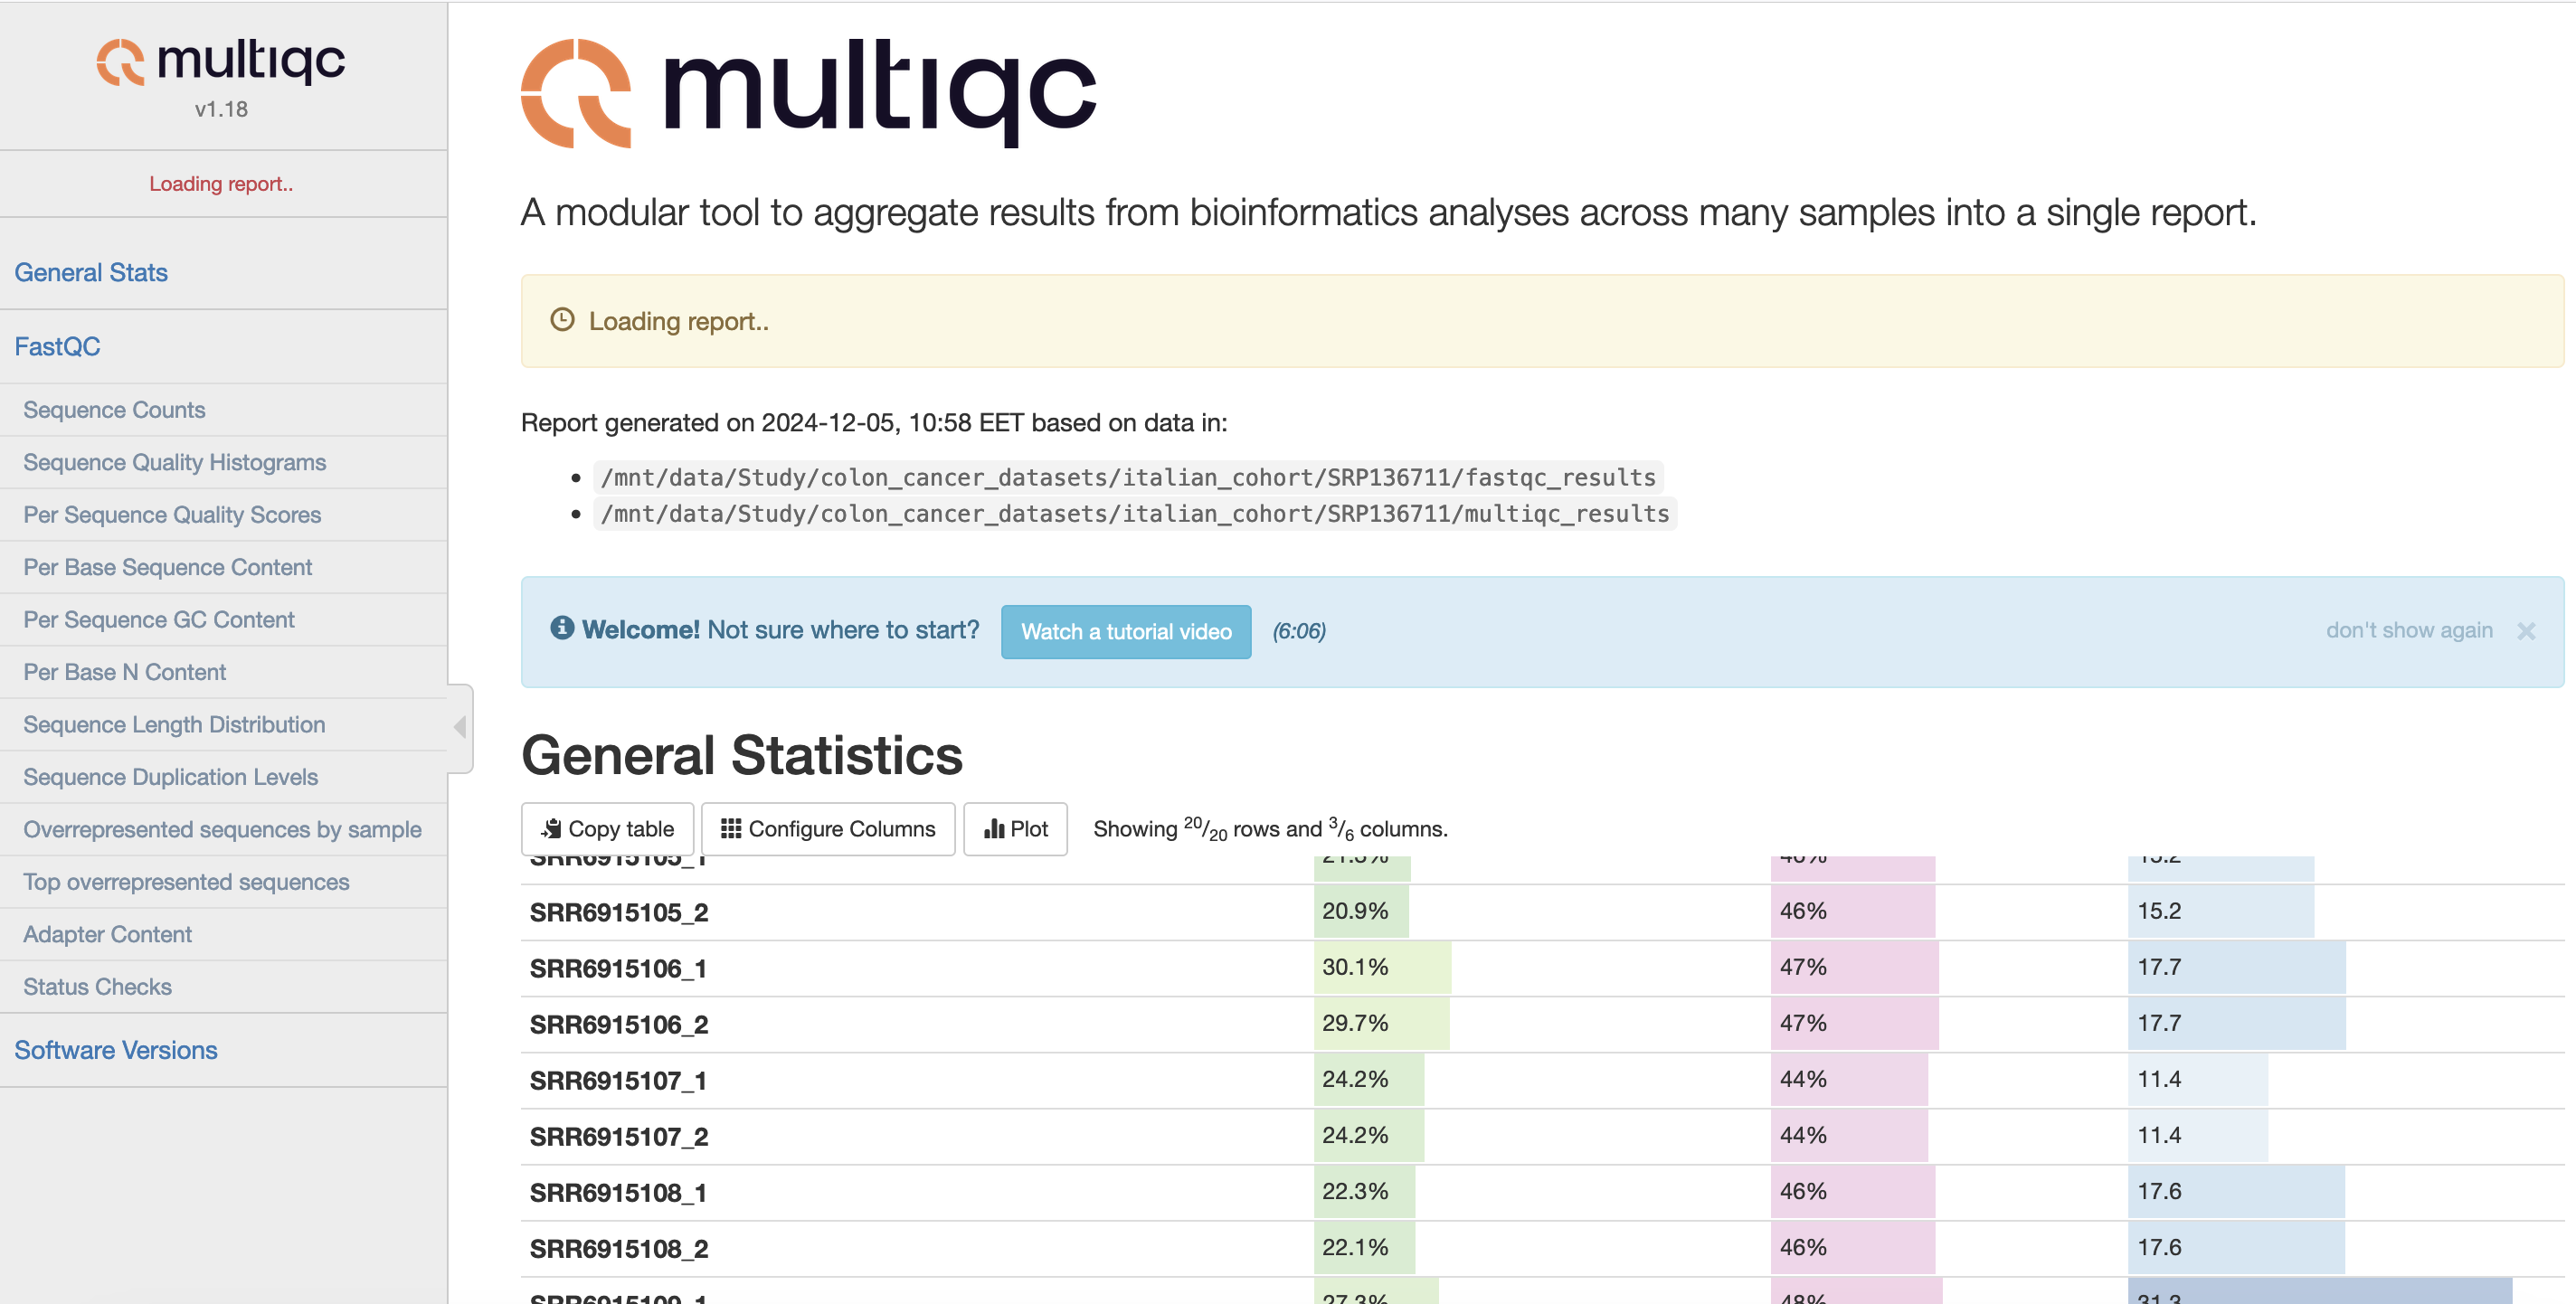{#fig-multi}



## Trimming sequences to enhance quality
This task involves removing sequences due to low quality or due to other measures (e.g., shorter than a particular length).

We will use here `trim-galore` to perform the trimming task. The program runs for each paired-eng sequence. Therefore, we will write a script to iterate over all the fastq files in the directory.

The following script provides that functionality.

```{.bash}
#!/bin/bash

# Create output directory if it doesn't exist
mkdir -p glore_output

# Loop over all R1 files ending with _1.fastq.gz
for r1 in raw_data/*_1.fastq.gz; do

  # Derive the corresponding R2 file by replacing _1 with _2
  r2="raw_data/$(basename "$r1" _1.fastq.gz)_2.fastq.gz"

  # Run Trim Galore for each pair and store output in glore_output
  trim_galore --nextera  --quality 20 --length 75 --paired "$r1" "$r2" --output_dir glore_output
done
```